In [ ]:
true_labels = {
    'C1' : 'G',
    'C2' : 'J',
    'C3' : 'O',
    'C4' : 'N',
    'C5' : 'U',
    'C6' : 'M',
    'C7' : 'T',
    'C8' : 'L',
    'C9' : '7',
    'C10' : 'E',
    'C11' : 'D',
    'C12' : '8',
    'C13' : 'S',
    'C14' : 'H',
    'C15' : '2',
    'C16' : '5',
    'C17' : '4',
    'C18' : 'C',
    'C19' : 'P',
    'C20' : '1',
    'C21' : '6',
    'C22' : 'Q',
    'C23' : 'B',
    'C24' : '3',
    'C25' : '9',
    'C26' : 'A',
    'C27' : '0',
    'C28' : 'I',
    'C29' : 'F',
    'C30' : 'K',
}

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to the Excel file
excel_file = "Human Recognition of Historical Handwritten Characters (respuestas).ods"

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

# Display the first few rows of the DataFrame
df['ACountry'].value_counts()

df['Mother Language'].value_counts()

Mother Language
Spanish     60
Italian     16
English     10
Spanish      8
German       3
Polish       2
Swedish      1
Turkish      1
English      1
French       1
Romanian     1
Name: count, dtype: int64

C1:
  Unique Responses: ['G', 'J', 'Y', 'A', 'D']
  Correct Guesses: 56
  Correct Answer: G
C2:
  Unique Responses: ['G', 'F', 'J', 'Y', 'K', 'E', 'I']
  Correct Guesses: 60
  Correct Answer: J
C3:
  Unique Responses: ['O', 'D', 'S', 'Z', '0', 'J', 'V', 'W', '6', 'B', 'A', 'E', 'P', 'C', '8', 'I', 'T']
  Correct Guesses: 67
  Correct Answer: O
C4:
  Unique Responses: ['N', 'D']
  Correct Guesses: 103
  Correct Answer: N
C5:
  Unique Responses: ['U', 'E', 'N', 'M', 'V', 'H', 'A']
  Correct Guesses: 98
  Correct Answer: U
C6:
  Unique Responses: ['M', 'Y', 'N', 'P', 'U', 'B', 'J', 'I', 'F', 'T']
  Correct Guesses: 64
  Correct Answer: M
C7:
  Unique Responses: ['A', 'R', 'T', 'U', 'L', 'H', 'M', 'C', 'O', 'N']
  Correct Guesses: 59
  Correct Answer: T
C8:
  Unique Responses: ['U', 'L', 'J', 'B', 'V', 'A', 'I', 'E']
  Correct Guesses: 84
  Correct Answer: L
C9:
  Unique Responses: ['7', 'J', 'T', 'Z', 'I', 'L', 'R', 'C', 'F']
  Correct Guesses: 68
  Correct Answer: 7
C10:
  Unique Respons

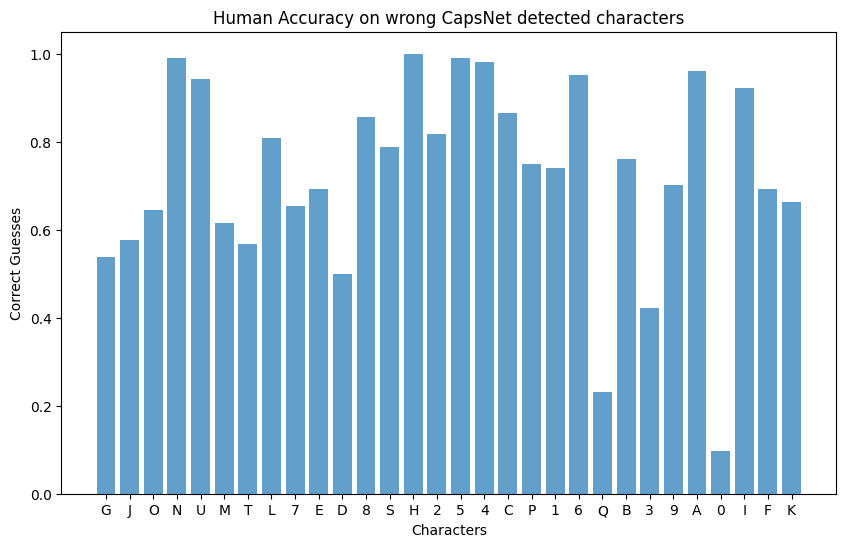

In [68]:
c_columns = [col for col in df.columns if col.startswith('C')]

data = df[c_columns].astype(str)

results = {}
guesses_tables = {}

for column in c_columns:
    unique_responses = data[column].unique()
    correct_count = (data[column] == true_labels[column]).sum()
    value_counts = data[column].value_counts() 
    results[column] = {
        "unique_responses": unique_responses.tolist(),
        "correct_guesses": correct_count,
        "correct_answer": true_labels[column]
    }

    guesses_tables[column] = value_counts.reset_index()
    guesses_tables[column].columns = ['Guess', 'Count']

# Display results
for col, stats in results.items():
    print(f"{col}:")
    print(f"  Unique Responses: {stats['unique_responses']}")
    print(f"  Correct Guesses: {stats['correct_guesses']}")
    print(f"  Correct Answer: {stats['correct_answer']}")

max_correct = max(results[col]["correct_guesses"] for col in c_columns)
for col in c_columns:
    results[col]["normalized_correct"] = results[col]["correct_guesses"] / max_correct

labels = [results[col]["correct_answer"] for col in c_columns]
normalized_correct = [results[col]["normalized_correct"] for col in c_columns]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, normalized_correct, alpha=0.7)
plt.xlabel("Characters")
plt.ylabel("Correct Guesses")
plt.title("Human Accuracy on wrong CapsNet detected characters")
plt.show()

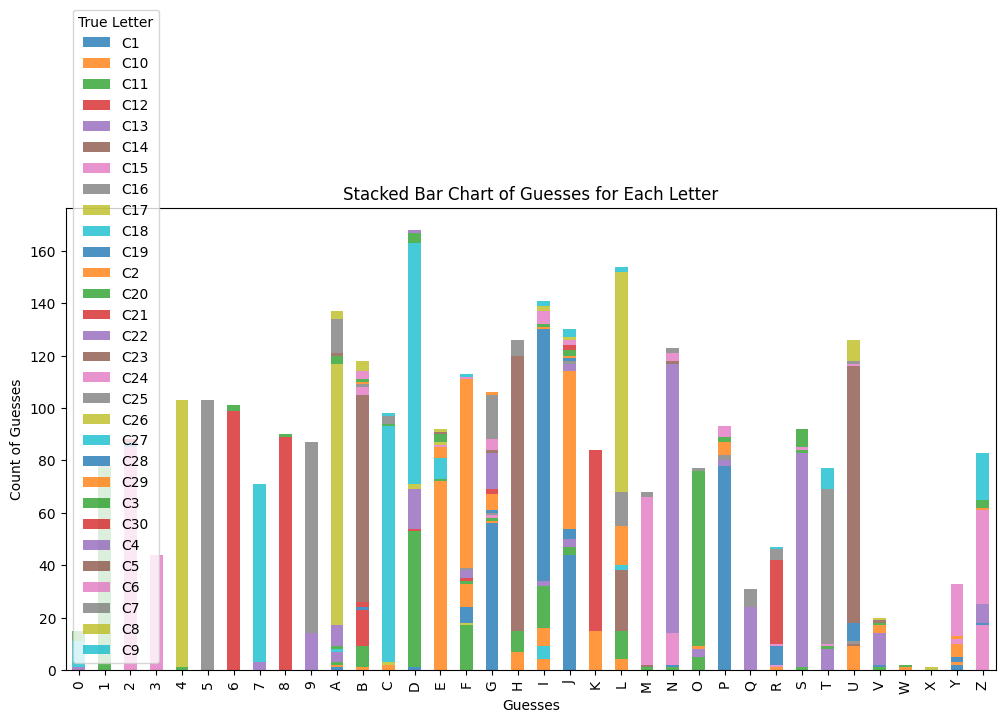

In [49]:
c_columns = [col for col in data.columns if col.startswith('C')]
data = data[c_columns]  # Filter to only include "C" columns

guesses_tables = {}
for col in data.columns:
    guesses_tables[col] = data[col].value_counts().reset_index()
    guesses_tables[col].columns = ['Guess', 'Count']
    guesses_tables[col]['True_Letter'] = col

# Combine all tables
stacked_data = pd.concat(guesses_tables.values(), ignore_index=True)

# Pivot for stacked bar chart with aggregation
pivot_table = stacked_data.pivot_table(
    index='Guess', columns='True_Letter', values='Count', aggfunc='sum', fill_value=0
)

# Plot the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), alpha=0.8)

# Add labels and title
plt.xlabel("Guesses")
plt.ylabel("Count of Guesses")
plt.title("Stacked Bar Chart of Guesses for Each Letter")
plt.legend(title="True Letter")
plt.show()

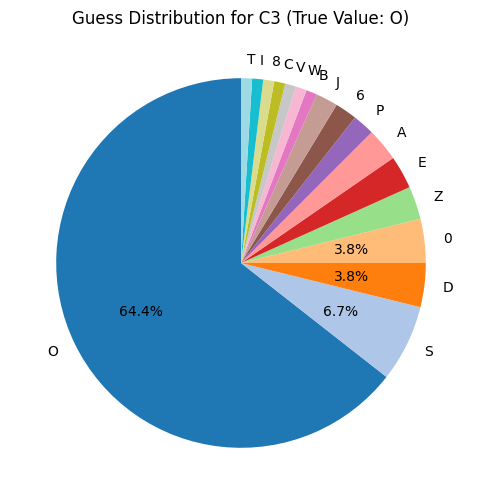

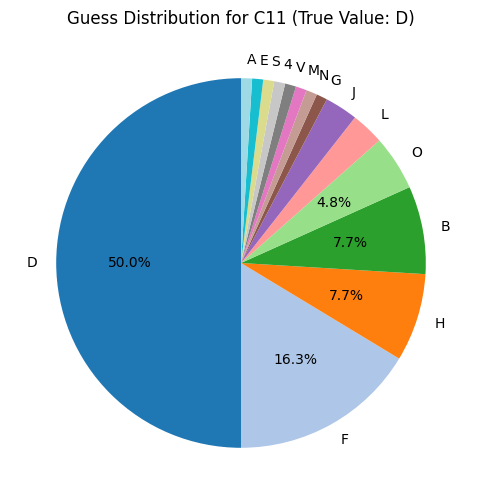

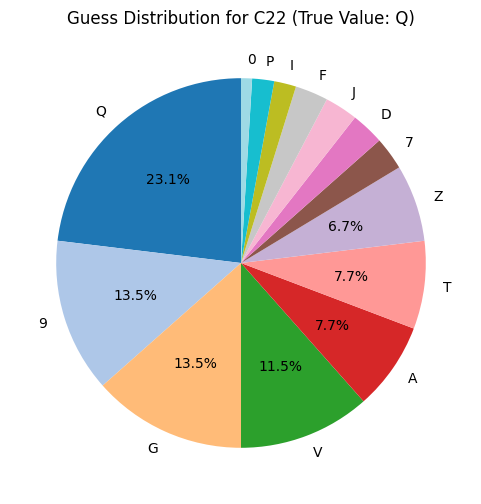

In [60]:
# Count unique guesses for each column
unique_counts = {col: data[col].nunique() for col in c_columns}

# Sort columns by the number of unique guesses and select the top 3
top_3_columns = sorted(unique_counts, key=unique_counts.get, reverse=True)[:3]

# Custom function to display percentages above 3%
def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 3 else ''

# Create pie charts for the top 3 columns
for col in top_3_columns:
    guess_counts = c_data[col].value_counts()
    plt.figure(figsize=(6, 6))
    guess_counts.plot(kind='pie', autopct=autopct_format, startangle=90, cmap="tab20")
    
    # Add the true value to the title
    true_value = true_labels.get(col, "Unknown")
    plt.title(f"Guess Distribution for {col} (True Value: {true_value})")
    plt.ylabel("")  # Remove default ylabel
    plt.show()

In [61]:
# Calculate accuracy for each row
correct_counts = data.apply(lambda row: sum(row[col] == true_labels[col] for col in c_columns), axis=1)

# Calculate overall accuracy
total_answers = data.size  # Total number of answers
total_correct = correct_counts.sum()  # Total number of correct answers
overall_accuracy = (total_correct / total_answers) * 100

print(f"Overall Accuracy: {overall_accuracy:.2f}%")

Overall Accuracy: 72.40%


In [72]:
# Group ages into 10-year ranges
age_bins = [0, 20, 30, 40, 50]  # Define the bins for age ranges
age_labels = ['0-19', '20-29', '30-39', '40-49']  # Define labels for the ranges
df['Age Range'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Create demographic summaries
demographic_table = pd.DataFrame({
    "Variable": [
        "Most Common Age Range",
        "Most Common Country",
        "Most Common Level of Education",
        "Most Common Gender"
    ],
    "Value": [
        df['Age Range'].mode()[0],          # Most common age range
        df['ACountry'].mode()[0],           # Most common country
        df['Level of Education'].mode()[0],   # Most common education level
        df['Gender'].mode()[0]             # Most common gender
    ]
})

# Count unique age ranges, countries, education levels, and gender
age_range_counts = df['Age Range'].value_counts().reset_index()
country_counts = df['ACountry'].value_counts().reset_index()
education_counts = df['Level of Education'].value_counts().reset_index()
gender_counts = df['Gender'].value_counts().reset_index()

# Rename columns for clarity
age_range_counts.columns = ['Age Range', 'Count']
country_counts.columns = ['ACountry', 'Count']
education_counts.columns = ['Level of Education', 'Count']
gender_counts.columns = ['Gender', 'Count']

# Display the main demographic table and detailed breakdowns
print("Main Demographic Summary")
print(demographic_table)
print("\nAge Range Breakdown")
print(age_range_counts)
print("\nCountry Breakdown")
print(country_counts)
print("\nEducation Level Breakdown")
print(education_counts)
print("\nGender Breakdown")
print(gender_counts)


Main Demographic Summary
                         Variable              Value
0           Most Common Age Range              20-29
1             Most Common Country              Spain
2  Most Common Level of Education  Bachelor's Degree
3              Most Common Gender               Male

Age Range Breakdown
  Age Range  Count
0     20-29     61
1     40-49     13
2     30-39     12
3      0-19      2

Country Breakdown
         ACountry  Count
0           Spain     64
1           Italy     15
2   United States      8
3         Germany      3
4          France      2
5          Spain       2
6          Poland      2
7       Argentina      1
8     Switzerland      1
9          Sweden      1
10  United states      1
11          Korea      1
12         Turkey      1
13        Ireland      1
14        Romania      1

Education Level Breakdown
  Level of Education  Count
0  Bachelor's Degree     45
1     Masters Degree     35
2        High School     18
3              Other      4
4   Doct

In [65]:
data.columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
       'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30'],
      dtype='object')